<a href="https://www.kaggle.com/code/sjagkoo7/heart-failure-prediction-am?scriptVersionId=132885925" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
heart=pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")
heart.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
heart.describe().T

count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0

In [5]:
heart.profile_report(title='Heart Attack EDA Summary',progress_bar=False)

In [6]:
heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

> Categorical Value = Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,HeartDisease

#### Correlation Matrix

In [7]:
corr=heart.corr()
corr

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000

<AxesSubplot:>

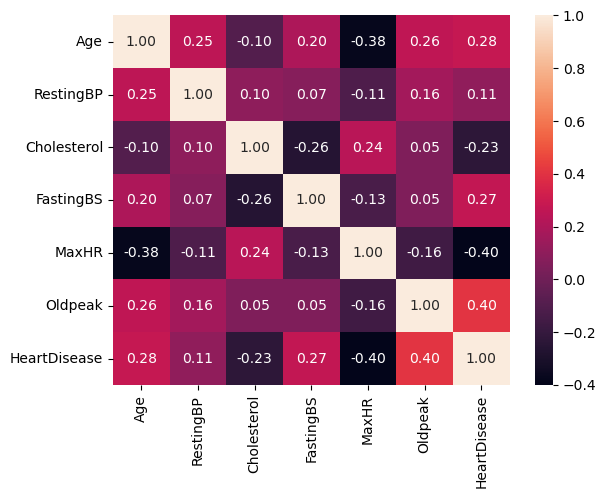

In [8]:
sns.heatmap(corr,annot=True,fmt='0.2f')


> Insight
* A positive correlation means that the variables move in the same direction. Put another way, it means that as one variable increases so does the other, and conversely, when one variable decreases so does the other. A negative correlation means that the variables move in opposite directions.
* The relationship between two variables is generally considered strong when their r value is larger than 0.7.


#### HeartDisease effect based on Sex

Text(0.5, 1.0, 'Distribution of HeartDisease')

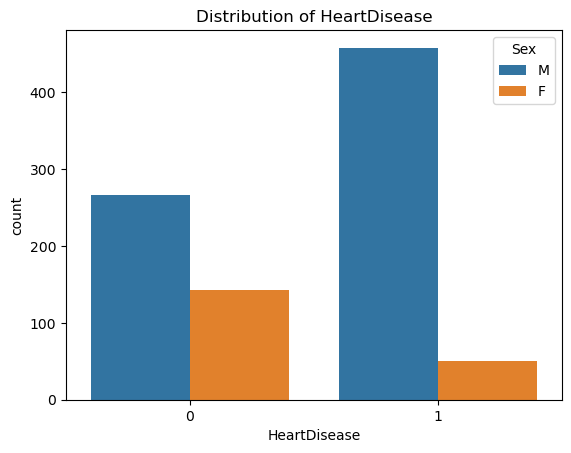

In [9]:
sns.countplot(data=heart,x='HeartDisease',hue='Sex')
plt.title('Distribution of HeartDisease')

> Insight
* Male having higher chances of  HeartDisease as compare to Female

#### ChestPainType based on Sex

Text(0.5, 1.0, 'Distribution of ChestPainType')

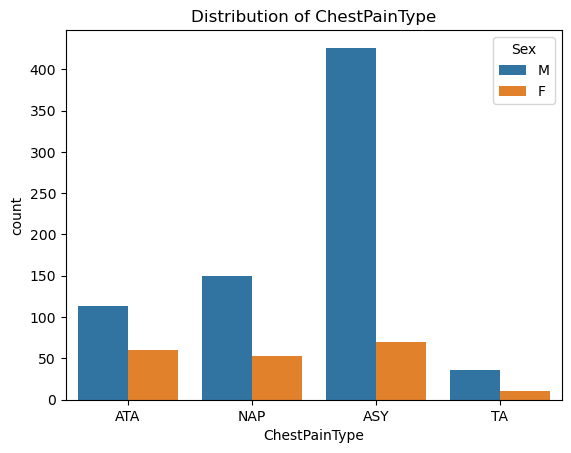

In [10]:
sns.countplot(data=heart,x='ChestPainType',hue='Sex')
plt.title('Distribution of ChestPainType')

> Insight
* ChestPainType - ASY symptoms having high in Males as compare to Female

Text(0.5, 1.0, 'Sex ratio in the Data')

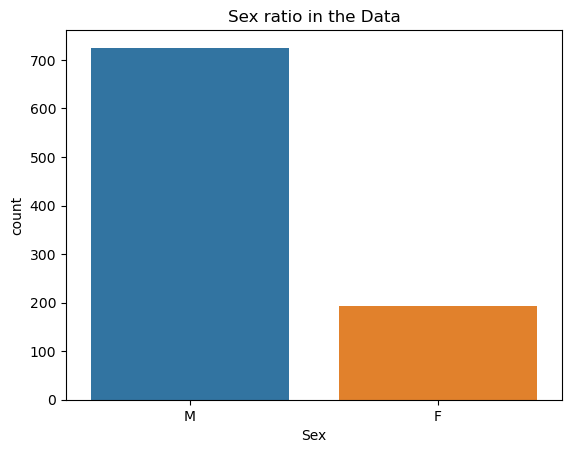

In [11]:
sns.countplot(data=heart,x='Sex')
plt.title('Sex ratio in the Data')

> Insight
* Male number is more as compare to Female

Text(0.5, 1.0, 'Distribution of RestingECG')

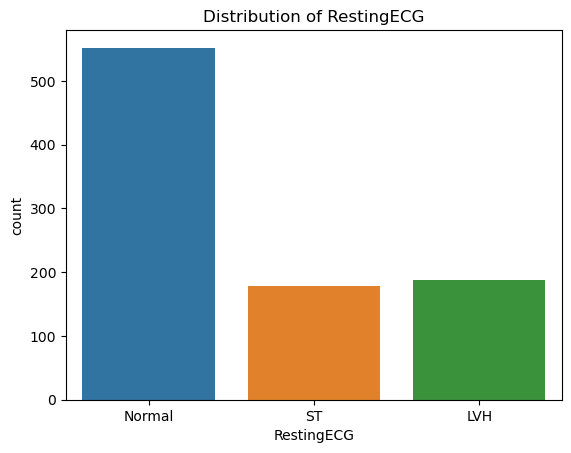

In [12]:
sns.countplot(data=heart,x='RestingECG')
plt.title('Distribution of RestingECG')

> Insight
* Normal RestingECG is more than other RestingECG

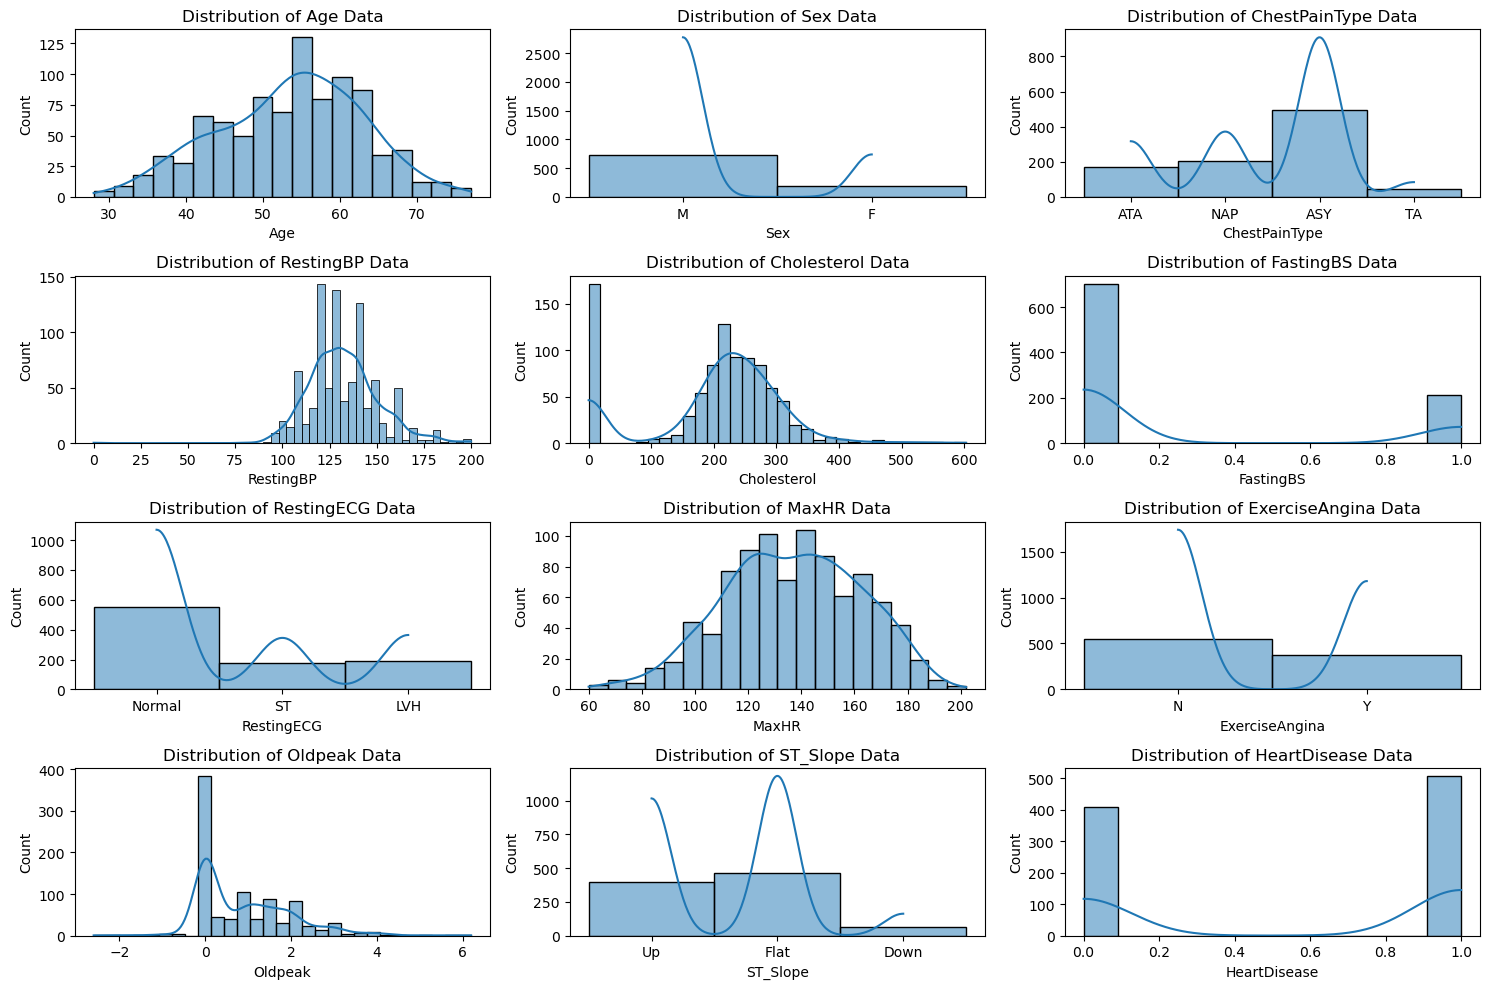

In [13]:
plt.figure(figsize=(15,10))
for i,col in enumerate(heart.columns,1):
    plt.subplot(4,3,i)
    plt.title(f'Distribution of {col} Data')
    sns.histplot(heart[col],kde=True) ##kde for lining
    plt.tight_layout() ## adjust the title and x title

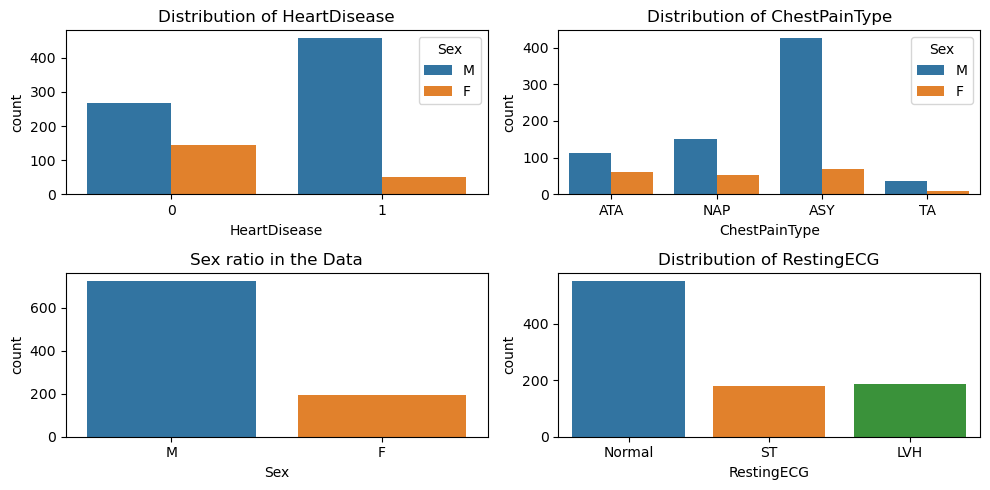

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.countplot(data=heart,x='HeartDisease',hue='Sex')
plt.title('Distribution of HeartDisease')
plt.tight_layout()
plt.subplot(2,2,2)
sns.countplot(data=heart,x='ChestPainType',hue='Sex')
plt.title('Distribution of ChestPainType')
plt.tight_layout()
plt.subplot(2,2,3)
sns.countplot(data=heart,x='Sex')
plt.title('Sex ratio in the Data')
plt.tight_layout()
plt.subplot(2,2,4)
sns.countplot(data=heart,x='RestingECG')
plt.title('Distribution of RestingECG')
plt.tight_layout()

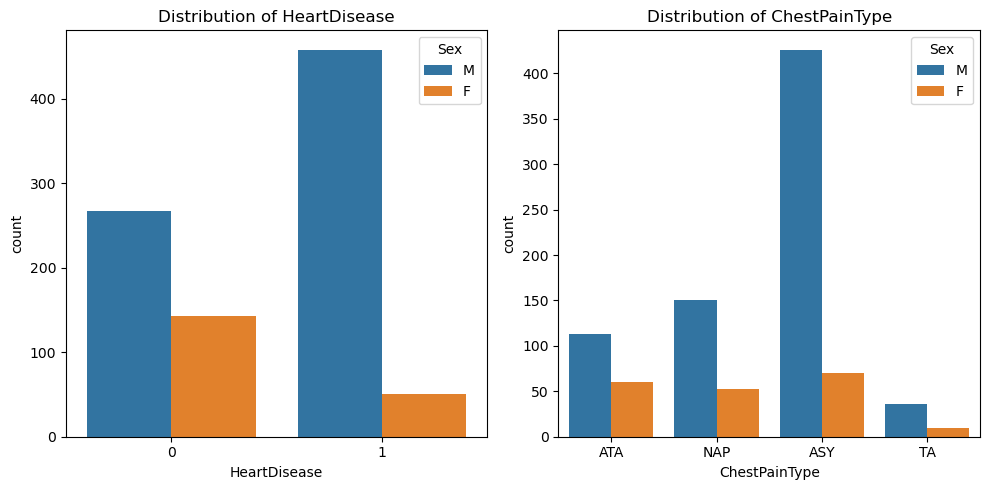

In [15]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=heart,x='HeartDisease',hue='Sex')
plt.title('Distribution of HeartDisease')
plt.tight_layout()
plt.subplot(1,2,2)
sns.countplot(data=heart,x='ChestPainType',hue='Sex')
plt.title('Distribution of ChestPainType')
plt.tight_layout()

#### Outliers

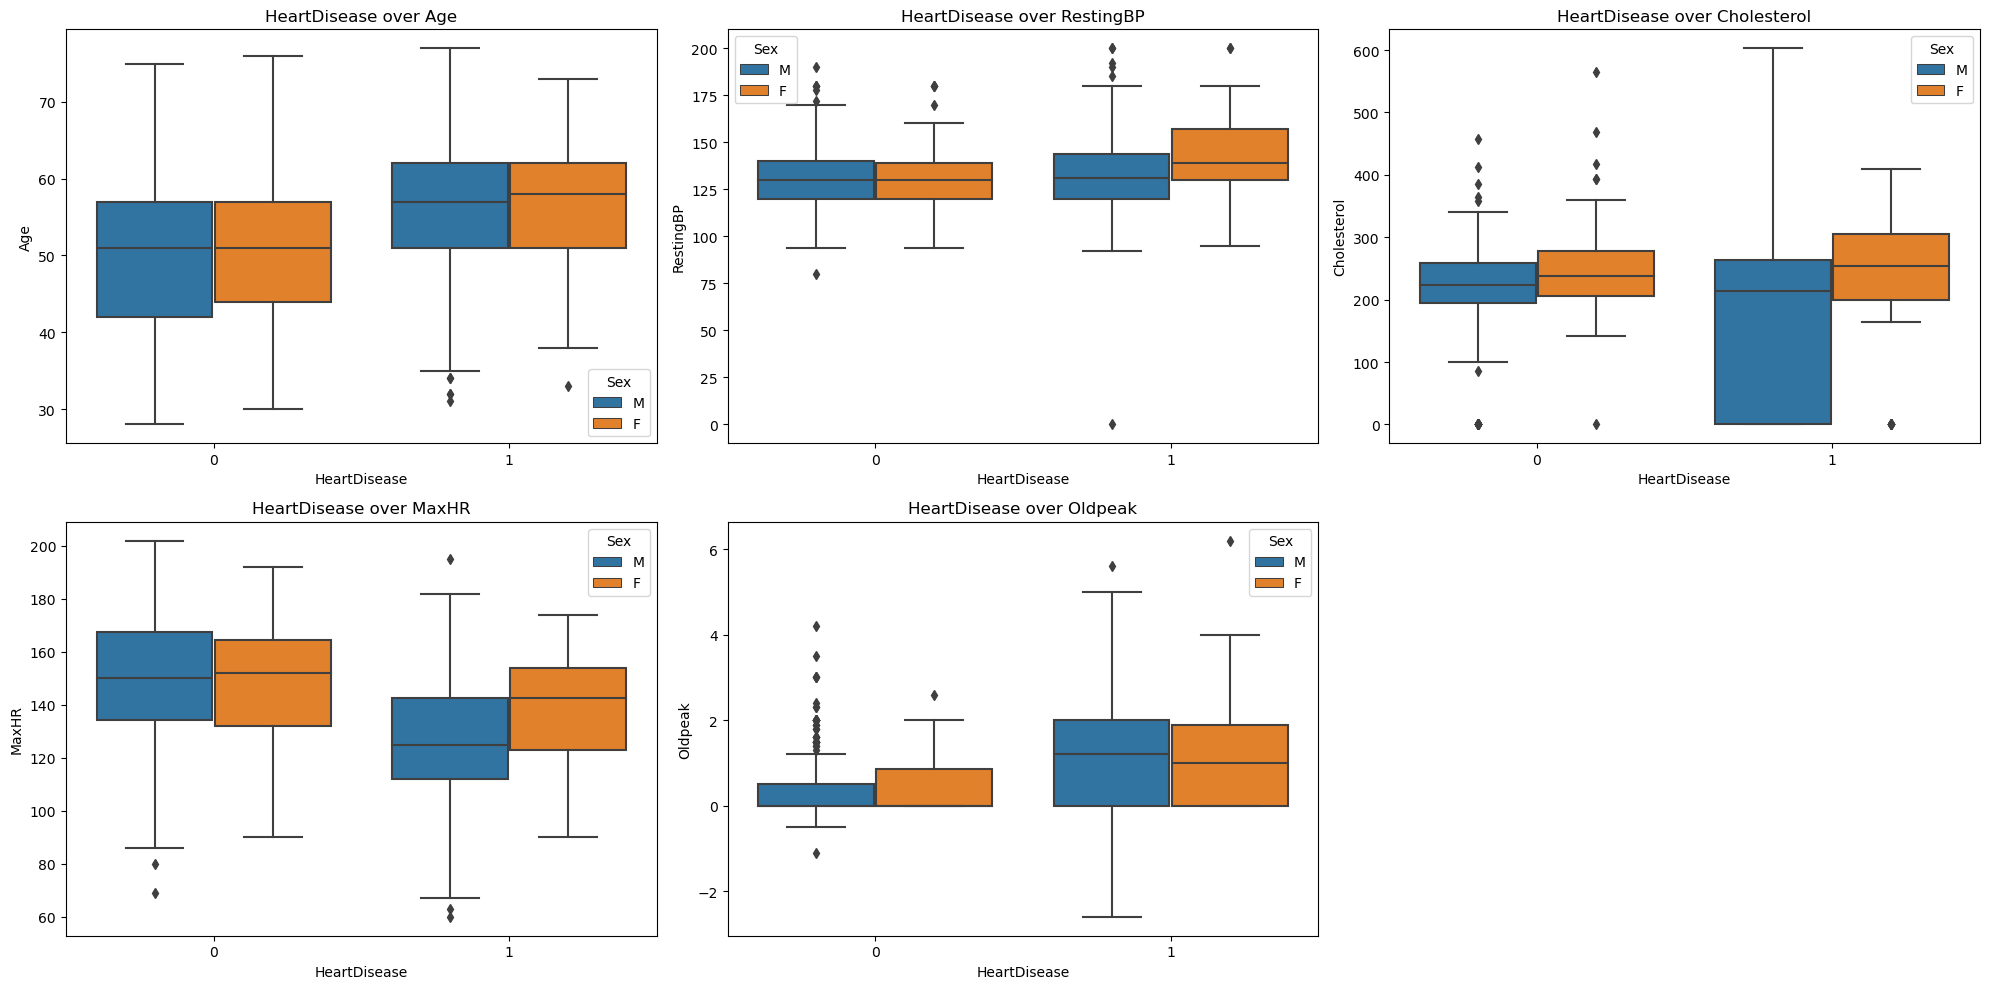

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.boxplot(data=heart,x='HeartDisease',y='Age',hue='Sex')
plt.title('HeartDisease over Age')
plt.subplot(2,3,2)
sns.boxplot(data=heart,x='HeartDisease',y='RestingBP',hue='Sex')
plt.title('HeartDisease over RestingBP')
plt.subplot(2,3,3)
sns.boxplot(data=heart,x='HeartDisease',y='Cholesterol',hue='Sex')
plt.title('HeartDisease over Cholesterol')
plt.subplot(2,3,4)
sns.boxplot(data=heart,x='HeartDisease',y='MaxHR',hue='Sex')
plt.title('HeartDisease over MaxHR')
plt.subplot(2,3,5)
sns.boxplot(data=heart,x='HeartDisease',y='Oldpeak',hue='Sex')
plt.title('HeartDisease over Oldpeak')
plt.tight_layout()


> Insight
* **HeartDisease over Age** - Male Age 30-35 yrs. range having HeartDisease are outliers.
* **HeartDisease over RestingBP** -  Male RestingBP 175-200 range having no HeartDisease and 180-200 range having HeartDisease are outliers.
* **HeartDisease over Cholesterol** - Male + Female having Cholesterol 400+ having no HeartDisease are outliers.
* **HeartDisease over MaxHR** - no outliers.
* **HeartDisease over Oldpeak** - Male Oldpeak having greater than 1 are outliers.


# Data Pre-processing
* Handling Null Values
* Feature Scaling
* Handling Categorical Variables

In [17]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#### Feature Encoding

In [18]:
heart1=heart.copy()
# heart1['Sex']=heart1.Sex.map({'M':0,'F':1})
# heart1['ChestPainType']=heart1.ChestPainType.map({'ATA':0, 'NAP':1, 'ASY':2, 'TA':3})
# heart1['RestingECG']=heart1.RestingECG.map({'Normal':0, 'ST':1, 'LVH':2})
# heart1['ExerciseAngina']=heart1.ExerciseAngina.map({'N':0, 'Y':1})
# heart1['ST_Slope']=heart1.ST_Slope.map({'Up':0, 'Flat':1, 'Down':2})
def transform_categorical_column(heart1,column_name):
    catagories=heart1[column_name].value_counts().index.to_list()
    map_cat={k:v for v,k in enumerate(catagories)}
    reverse_map_cat={v:k for k,v in map_cat.items()}
    heart1[column_name]=heart1[column_name].map(map_cat)
    return heart1,map_cat,reverse_map_cat
    
heart1,map_sex,reverse_map_sex=transform_categorical_column(heart1,'Sex')
heart1,map_ChestPainType,reverse_map_ChestPainType=transform_categorical_column(heart1,'ChestPainType')
heart1,map_RestingECG,reverse_map_RestingECG=transform_categorical_column(heart1,'RestingECG')
heart1,map_ExerciseAngina,reverse_map_ExerciseAngina=transform_categorical_column(heart1,'ExerciseAngina')
heart1,map_ST_Slope,reverse_map_ST_Slope=transform_categorical_column(heart1,'ST_Slope')

In [19]:
heart1.head(5)
#heart.head(5)

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    0              2        140          289          0           0   
1   49    1              1        160          180          0           0   
2   37    0              2        130          283          0           2   
3   48    1              0        138          214          0           0   
4   54    0              1        150          195          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         1             0  
1    156               0      1.0         0             1  
2     98               0      0.0         1             0  
3    108               1      1.5         0             1  
4    122               0      0.0         1             0

#### Using Decission tree Classifier

In [20]:
#importing the libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report

#### Model without removing the outliers.

In [21]:
heart1.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [22]:
X=heart1[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS','RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
y=heart1['HeartDisease']


In [23]:
#Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [24]:
dtree=DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)

In [25]:
accuracy_score(y_test,y_pred)

0.7971014492753623

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       123
           1       0.83      0.80      0.81       153

    accuracy                           0.80       276
   macro avg       0.79      0.80      0.80       276
weighted avg       0.80      0.80      0.80       276



#### Model after  removing the outliers.

> Insight
* HeartDisease over Age - Male Age 30-35 yrs. range having HeartDisease are outliers.
* HeartDisease over RestingBP - Male RestingBP 175-200 range having no HeartDisease and 180-200 range having HeartDisease are outliers.
* HeartDisease over Cholesterol - Male + Female having Cholesterol 400+ having no HeartDisease are outliers.
* HeartDisease over MaxHR - no outliers.
* HeartDisease over Oldpeak - Male Oldpeak having greater than 1 are outliers.

In [27]:
heart1.drop(heart1[(heart1['Sex']==0) & (heart1['HeartDisease']==1) & (heart1['Age']>30) &  (heart1['Age']<35)].index,inplace=True)
heart1.drop(heart1[(heart1['Sex']==0)& (heart1['RestingBP']>175)& (heart1['RestingBP']<200)& (heart1['HeartDisease']==0)].index,inplace=True)
heart1.drop(heart1[(heart1['Sex']==0)& (heart1['RestingBP']>180)& (heart1['RestingBP']<200)& (heart1['HeartDisease']==1)].index,inplace=True)
heart1.drop(heart1[(heart1['Cholesterol']>400)& (heart1['HeartDisease']==0)].index,inplace=True)
heart1.drop(heart1[(heart1['Sex']==0)& (heart1['Oldpeak']>1.0)].index,inplace=True)

In [28]:
X=heart1[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS','RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
y=heart1['HeartDisease']

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [30]:
dtree=DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)

In [31]:
accuracy_score(y_test,y_pred)

0.8172043010752689

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       106
           1       0.76      0.85      0.80        80

    accuracy                           0.82       186
   macro avg       0.82      0.82      0.82       186
weighted avg       0.82      0.82      0.82       186

